
# 彩图分辨率设置与读取

```
@作者: 阿凯爱玩机器人
@QQ: 244561792
@微信: xingshunkai
@邮箱: xingshunkai@qq.com
@网址: deepsenserobot.com
@B站: "阿凯爱玩机器人"
```


## 导入依赖

In [1]:
import time
import sys
import os

# 导入阿凯写的Orbbec工具库
# 确保orbbec_utils.py跟你目前所执行的脚本在同一级目录下
from orbbecsdk_utils import *
# 添加Python Path
add_path_pyorbbecsdk()

# 导入pyorbbecsdk
from pyorbbecsdk import *

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

## 连接相机

In [3]:
# 连接设备
ret, device = connect_device()
print(f"[INFO] 设备是否连接成功: {ret}")

[06/24 13:44:06.630588][info][17933][Context.cpp:68] Context created with config: default config!
[INFO] 设备是否连接成功: True
[06/24 13:44:06.630603][info][17933][Context.cpp:73] Work directory=/home/kyle/Project/奥比中光3D相机/Gemini335-软件资料-阿凯爱玩机器人/02.奥比中光-pyobbecsdk示例代码(Gemini335), SDK version=v1.10.5-20240511-7dc8be9
[06/24 13:44:06.630617][info][17933][LinuxPal.cpp:31] createObPal: create LinuxPal!
[06/24 13:44:06.701094][info][17933][LinuxPal.cpp:142] Create PollingDeviceWatcher!
[06/24 13:44:06.701114][info][17933][DeviceManager.cpp:15] Current found device(s): (1)
[06/24 13:44:06.701120][info][17933][DeviceManager.cpp:24] 	- Name: Orbbec Gemini 335, PID: 0x0800, SN/ID: CP1L44P00049, Connection: USB3.2


## 创建Pipeline

In [4]:
# 创建Pipeline
# 将device传入Pipeline
pipeline = Pipeline(device)

# 创建配置信息对象
config = Config()

## 彩色相机基本参数配置

基本参数包括如下信息:
* 图像宽度
* 图像高度
* 图像格式
* 帧率

### 获取基本参数列表

In [5]:
# 获取彩图选项列表
color_profile_list = pipeline.get_stream_profile_list(OBSensorType.COLOR_SENSOR)   
# 获取选项个数
profile_num = color_profile_list.get_count()
print(f"总共有{profile_num}个彩色图选项")

总共有264个彩色图选项


### 获取默认配置

In [6]:
# 获取默认的视频流配置
color_profile_default = color_profile_list.get_default_video_stream_profile()
print(type(color_profile_default))
# 打印默认配置
print_video_profile(color_profile_default)

<class 'pyorbbecsdk.VideoStreamProfile'>
视频流类型: OBStreamType.COLOR_STREAM
视频流格式: OBFormat.MJPG
分辨率 1280 x 720 帧率 30


### 获取特定编号的配置信息

In [12]:
# 选项索引号
# 编号范围: 0-264
index = 1
# 获取选项信息
profile = color_profile_list.get_stream_profile_by_index(index)

print(f"当前的Profile是否为视频流配置信息: {profile.is_video_stream_profile()}")
# 将选项信息转换为Video Stream Profile的格式
color_profile_by_index = profile.as_video_stream_profile()
# 打印配置信息
print_video_profile(color_profile_by_index)

当前的Profile是否为视频流配置信息: True
视频流类型: OBStreamType.COLOR_STREAM
视频流格式: OBFormat.YUYV
分辨率 320 x 180 帧率 60


### 手动创建配置信息

In [8]:
# 手动创建视频流索引
# 获取视频流索引
width = 1280 # 图像宽度
height = 720 # 图像高度
fmt = OBFormat.MJPG # 图像格式
fps = 30 # 帧率

try:
    # 手动创建彩色视频流配置信息
    color_profile = color_profile_list.get_video_stream_profile(width, height, fmt, fps)
    # 打印配置信息
    print_video_profile(color_profile)
except OBError:
    print("[ERROR] 没有对应的配置信息选项")


视频流类型: OBStreamType.COLOR_STREAM
视频流格式: OBFormat.MJPG
分辨率 1280 x 720 帧率 30


## 让配置生效

In [9]:
# 在配置信息里面定义彩色视频流的基本信息
config.enable_stream(color_profile)

# 开启管道
pipeline.start(config)

[06/24 13:44:07.201295][error][17933][HostProtocol.cpp:420] Set property value failed! propertyId:63, rc:{statusCode: 9, respErrorCode: 2, msg: }


## 读取彩图

彩图采集是否成功: True


<IPython.core.display.Javascript object>


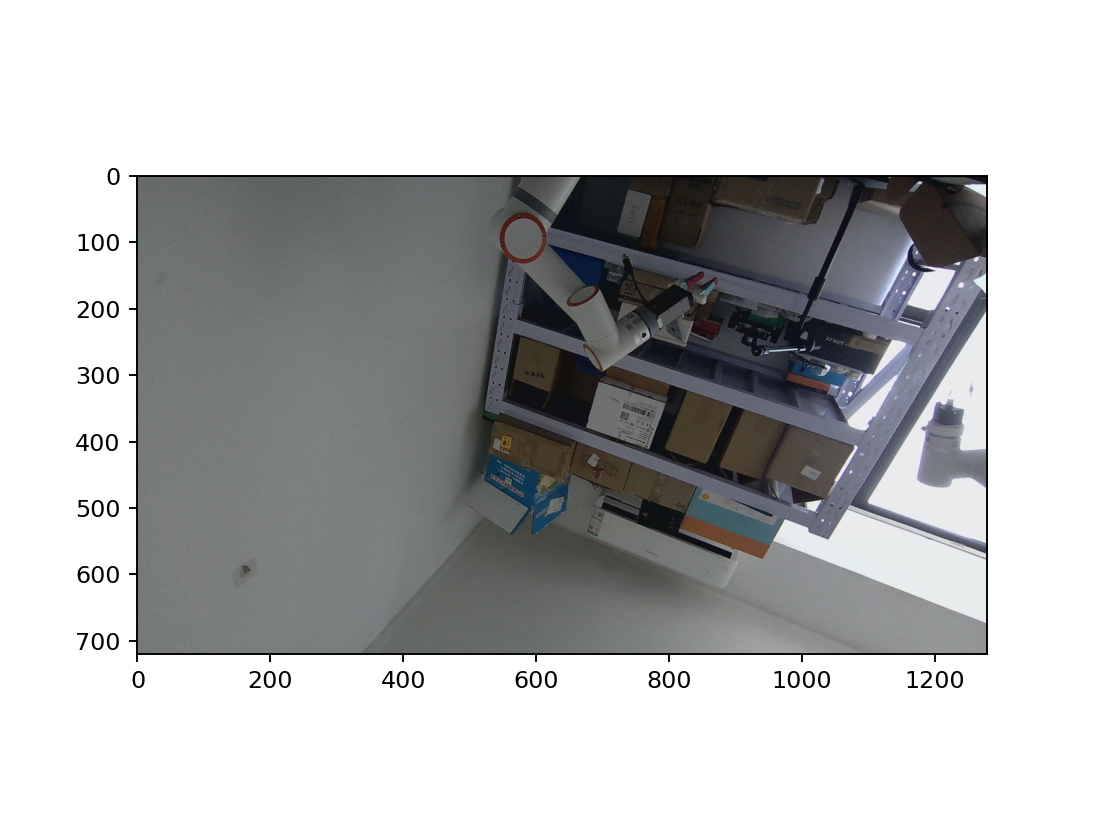

In [10]:
%matplotlib notebook
ret, color_img = capture_color_img(pipeline)
print(f"彩图采集是否成功: {ret}")

if ret:
    # 使用Matplotlib显示彩图
    plt.imshow(color_img[:,:,::-1])

从数据帧中获取彩图

彩图保存

In [11]:
cv2.imwrite("demo.png", color_img)

True